# BUILDING A DEEP FACIAL RECOGNITION APP WITH SIAMESE NEURAL NETWORL 

In [72]:
import tensorflow as tf
print("imported")

imported


!pip install  opencv-python matplotlib

In [2]:
#importing standard dependencies
import cv2
import os
import random
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [69]:
#importing tensorflow dependencies - functional api
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, Input, Flatten, MaxPooling2D

In [4]:
#seting up paths 
POS_PATH= os.path.join('data', 'positive')
NEG_PATH= os.path.join('data', 'negative')
ANC_PATH= os.path.join('data', 'anchor')

In [ ]:
#make directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

In [14]:
!tar -xf lfw.tgz

In [5]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [6]:
#just checking if the pictures are transfered to the folder
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        print(os.path.join('lfw', directory. file))
        print(os.path.join(NEG_PATH, file))

In [7]:
#import uuid library to generate unique image names
import uuid

In [8]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\ecfe7325-5d58-11ef-8729-c89402f78ace.jpg'

In [9]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()

    #Cut down frame to 250X250px
    frame = frame[120:120+250,200:200+250, :]


    #Collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        #Create the unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        #Write out anchor image
        cv2.imwrite(imgname, frame)

    #Collecting positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        #Create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        #Write out positive image
        cv2.imwrite(imgname, frame)

    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
#Close the image show frame
cv2.destroyAllWindows()

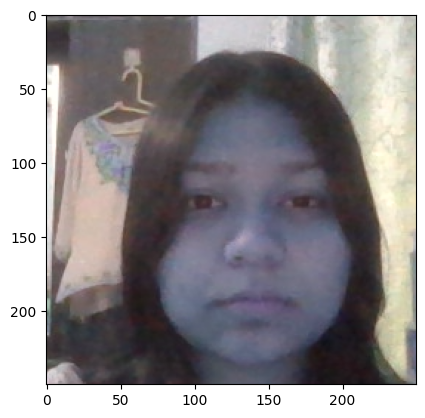

In [10]:
plt.imshow(frame)

In [ ]:
plt.imshow(frame[120:120+250, 200:200+250, :])   # image size to 250X250

Get image Directories

In [10]:
# Get image Directories
anchor = tf.data.Dataset.list_files(ANC_PATH+'\\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\\*.jpg').take(300)

In [11]:
#accessing data  
dir_test = anchor.as_numpy_iterator() #write the name of the dataset or the data or
                                      #pipeline and use .as_numpy_iterartor
dir_test.next() #continuously grab the next item

b'data\\anchor\\d6d519bc-588d-11ef-baf7-c89402f78ace.jpg'

In [12]:
def preprocess(file_path):      #load, resize, scaling 
    
    #Read in image from file path
    byte_img = tf.io.read_file(file_path)   
    
    #Load in the image
    img = tf.io.decode_jpeg(byte_img)

    #preprocessing steps- resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))  #
    
    #Scale image to be between 0 and 1 
    img = img/ 255.0

    # retun image
    return img

# Example of how the code works 

In [16]:
img = preprocess('data\\anchor\\cba04c0a-588d-11ef-b55c-c89402f78ace.jpg') # takes an example img

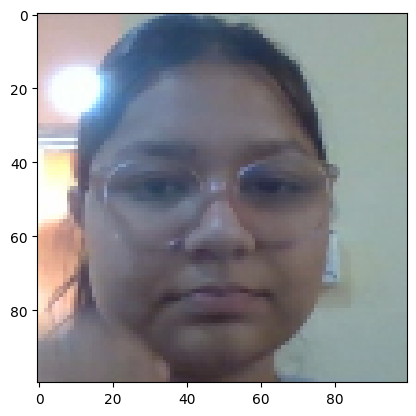

In [17]:
plt.imshow(img)

In [18]:
img.numpy().max() #to show the max scaling value isnt going past 255 which return 1  

1.0

(anchor, positive) == {1,1,1,1}
(anchor, negative) == {0,0,0,0}

In [13]:
#create labelled dataset
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor))))) #matched are return as1 
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor))))) #unmatched are return as 0
data = positives.concatenate(negatives) #joing postive and negative

In [20]:
data #a big dataset which has a shape of {(anc), (pos), (neg), type:....}

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [21]:
samples = data.as_numpy_iterator()

In [22]:
example = samples.next()

In [23]:
example

(b'data\\anchor\\d1824c7e-588d-11ef-bbee-c89402f78ace.jpg',
 b'data\\positive\\fa5c58fe-588d-11ef-a666-c89402f78ace.jpg',
 1.0)

In [14]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)    

In [15]:
res = preprocess_twin(*example)

NameError: name 'example' is not defined

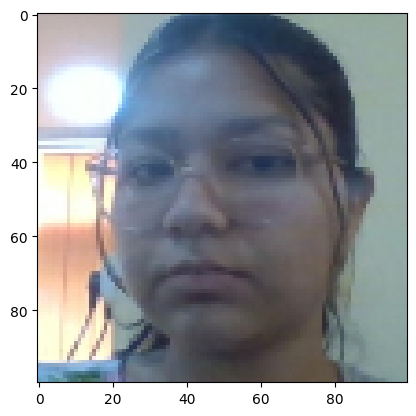

In [26]:
plt.imshow(res[1])

In [27]:
res[2]

1.0

In [16]:
#Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache() 
data = data.shuffle(buffer_size=1024)

In [29]:
samples = data.as_numpy_iterator()

In [30]:
len(samples.next())

3

In [43]:
samp = samples.next()

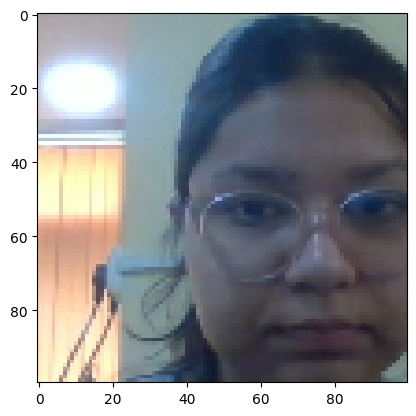

In [32]:
plt.imshow(samp[0])

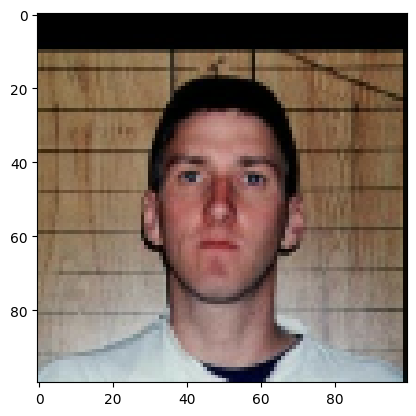

In [33]:
plt.imshow(samp[1])

In [34]:
samp[2]

0.0

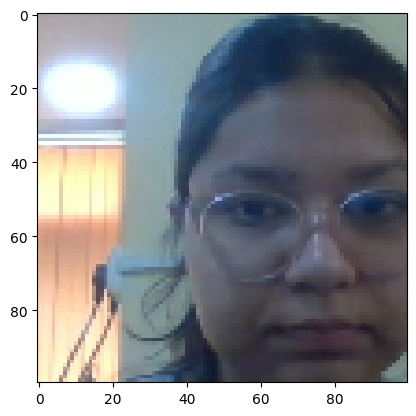

In [35]:
plt.imshow(samp[0])

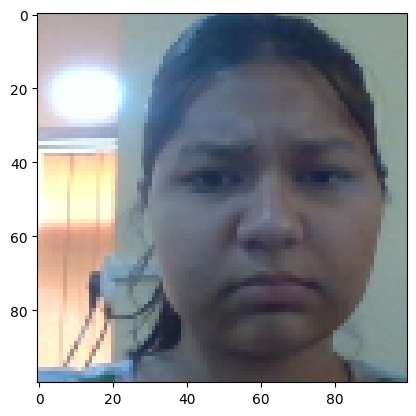

In [44]:
plt.imshow(samp[1])

In [46]:
samp[2] # run to get one 1 asa return value

1.0

In [17]:
#Training Partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [62]:
train_sample = train_data.as_numpy_iterator()

In [55]:
train_sample = train_sample.next()

In [56]:
len(train_sample[0])

16

In [18]:
#Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Build Embedding Layer

In [19]:
#taking pixel as 105x105 as example to understand from the paper 
inp = Input(shape=(105,105,3), name = 'input_image') #example for..

In [19]:
c1= Conv2D(64, (10,10), activation='relu')(inp)
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [20]:
c2= Conv2D(128, (7,7), activation='relu')(m1) 
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [79]:
c3= Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [80]:
c4= Conv2D(256, (4,4), activation='relu')(m3)  #convoluti
f1= Flatten()(c4)
d1= Dense(4096, activation='sigmoid')(f1)

In [81]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [82]:
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 105, 105, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 96, 96, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 42, 42, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 18, 18, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
def make_embedding():
    inp = Input(shape=(100,100,3), name='input_image')
    #first round
    c1= Conv2D(64, (10,10), activation='relu')(inp)  #convolutional layer acc to paper
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    #second round
    c2= Conv2D(128, (7,7), activation='relu')(m1)  #convolutional layer acc to paper
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    #third round
    c3= Conv2D(128, (4,4), activation='relu')(m2)  #convolutional layer acc to paper
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    #forth round
    c4= Conv2D(256, (4,4), activation='relu')(m3)  #convolutional layer acc to paper
    f1= Flatten()(c4)
    d1= Dense(4096, activation='sigmoid')(f1)

    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [21]:
embedding = make_embedding()

In [22]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

# Building Distance layer

In [23]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding[0] - validation_embedding[0])

In [78]:
l1 = L1Dist()

testing code sepeartely to see if there is no error
l1(anchor_embedding, validation_embedding)

input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

val_embedding

embedding(input_image)

siamese_layer = L1Dist()

distances= siamese_layer(inp_embedding, val_embedding)

distances

classifier = Dense(1, activation='sigmoid')(distances)

classifier

In [24]:
#siamese Model
def make_siamese_model():
    #anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    #Validation image in the network
    validation_image = Input(name='validation_img', shape=(100,100,3))

    #Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))

    #Classification Layer
    classifier = Dense(1, activation='sigmoid')(distances)

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')



In [25]:
siamese_model = make_siamese_model()

In [26]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist (L1Dist)              │ (None, 4096)              │               0 │ embedding[0][0],           │
│                               │                           │                 │ embedding[1][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING

In [27]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [28]:
opt = tf.keras.optimizers.Adam(1e-4)#0.0001  
#Adam optimizer lerarning rate(1e) of 4 

In [29]:
checkpoint_dir = './training_checkpoints'   #checkpoint directory
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt') #ckpt-all the model will start with it and then with a unique no. 
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model) 

In [ ]:
#the basic flow for fraining on one batch is as follows:
#1. Make a prediction
#2. Calculate loss
#3. Derive gradients
#4.Calculate new weights and apply

In [30]:
test_batch = train_data.as_numpy_iterator()

In [31]:
batch_1 = test_batch.next()

In [32]:
len(batch_1[0]) #we got 16 images in our batch  from anchor

16

In [33]:
len(batch_1[1]) #we got 16 images in our batch from pos/neg image

16

In [34]:
batch_1[2] #data type or label

array([0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
      dtype=float32)

In [35]:
X = batch_1[:2]

In [52]:
np.array(X).shape  #2 is the batch and in each batch in the dataset comprises of 16 samples,
                   #each of which conatins an anchor image, a pos/neg image and a label

(2, 16, 100, 100, 3)

In [36]:
y = batch_1[2]

In [37]:
y

array([0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
      dtype=float32)

In [56]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy',
    dtype=None,
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
        floating-point value which either represents a
        [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
        when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
        `from_logits=False`).

    Args:
        from_logits: Whether to interpret `y_pred` as a tensor of
            [logit](htt

In [38]:
@tf.function #decor #compiles a function into a callable Tensorflow graph
def train_step(batch):

    with tf.GradientTape() as tape:
        #Get anchor and positive//negative image
        X = batch[:2]
        #Get label
        y = batch[2]

        #forward pass
        yhat = siamese_model(X, training=True)
        #Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)

    #Calculate gradients           #the optimizer here is calculating and propagating the new weights using
                                    #Adams optimisation algorith, a variant of gradient descent.
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    #calculating updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))


    #return loss
    return loss
    

In [43]:
def train(data, EPOCHS):
    #Loop through Epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))

        #Loop through each Batch
        for idx, batch in enumerate(data):
            #Run train step here
            train_step(batch)
            progbar.update(idx+1)  #progress bar

        #Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [44]:
EPOCHS = 50

In [45]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
26/27 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/stepTensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
27/27 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step

 Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step

 Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step

 Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step

 Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step

 Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step

 Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step

 Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step

 Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step

 Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step

 Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step

 Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step

 Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step

 Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step

 Epoch 15/50
27/27 ━━━━━━━━━━━━━━━

# Evaluation model

In [41]:
#Importing metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [42]:
#Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [46]:
#make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step


array([[1.6604448e-08],
       [9.9998903e-01],
       [6.5340484e-09],
       [9.9999684e-01],
       [9.9999869e-01],
       [9.9999207e-01],
       [9.9999994e-01],
       [2.2519403e-08],
       [9.9999994e-01],
       [1.5000947e-07],
       [1.1377529e-07],
       [1.3528086e-08],
       [4.0282524e-09],
       [1.0000000e+00],
       [9.6301775e-08],
       [1.4781710e-06]], dtype=float32)

In [49]:
# Post processing the results
#[1 if y_hat > 0.5 else 0 for prediction in y_hat]
predictions = [1 if prediction > 0.5 else 0 for prediction in y_hat]

In [50]:
predictions

[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [51]:
y_true

array([0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

## Calculate Metrics

In [52]:
#Creating  a metric object
m = Recall()

#Calculating the recall value
m.update_state(y_true, y_hat)

#Return Recall result
m.result().numpy()

1.0

In [53]:
#Creating 
m = Precision()

#Calculating the recall value
m.update_state(y_true, y_hat)

#Return Recall result
m.result().numpy()

1.0

## Viz results


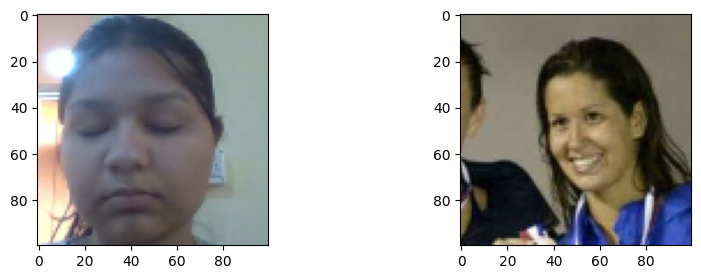

In [65]:
#set plot size
plt.figure(figsize=(10,3))

#set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])  # first input prediction output 0
plt.subplot(1,2,2)
plt.imshow(test_val[0])

#Render cleanly
plt.show()

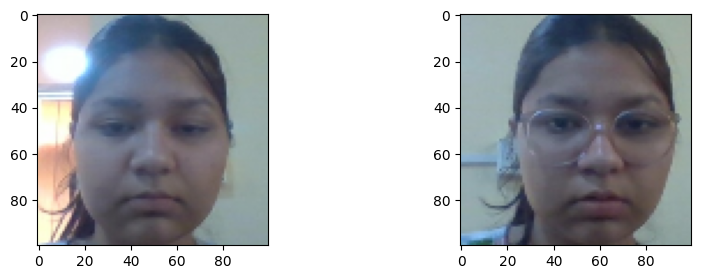

In [64]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(test_input[1])  # second input prediction output 1
plt.subplot(1,2,2)
plt.imshow(test_val[1])
plt.show()

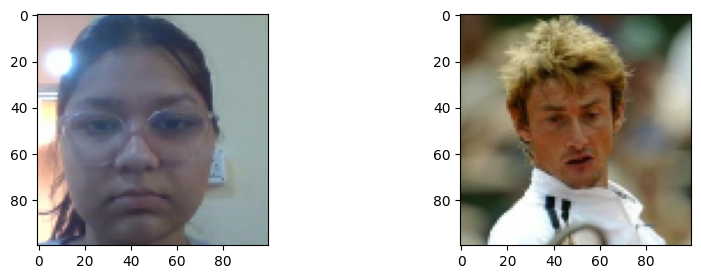

In [62]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(test_input[2])  # third input prediction output 0
plt.subplot(1,2,2)
plt.imshow(test_val[2])
plt.show()

## Save Model

In [71]:
#save weights
#siamese_model.save('siamesemodel.h5')
siamese_model.save('siamesemodel.keras')

In [75]:
#Reload model
model = tf.keras.models.load_model('siamesemodel.keras', custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
tf.keras.models.load_model?? 

In [82]:
model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


array([[1.6604448e-08],
       [9.9998903e-01],
       [6.5340484e-09],
       [9.9999684e-01],
       [9.9999869e-01],
       [9.9999207e-01],
       [9.9999994e-01],
       [2.2519403e-08],
       [9.9999994e-01],
       [1.5000947e-07],
       [1.1377529e-07],
       [1.3528086e-08],
       [4.0282524e-09],
       [1.0000000e+00],
       [9.6301775e-08],
       [1.4781710e-06]], dtype=float32)

In [83]:
model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_1 (L1Dist)            │ (None, 4096)              │               0 │ embedding[0][0],           │
│                               │                           │                 │ embedding[1][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

#### this is the end of the end of building a Deep Facial Recognition app using tensorflow and opencv...

## THANKYOU 